# Desafio 4.

#### Exercício 1: Acesse a [API da NBA](https://github.com/swar/nba_api) para ter acesso às informações dos times e jogadores. Crie um dataframe dos clubes e dos jogadores e escolha o jogador `Kobe Bryant` para fazer um estudo. Calcule quantos arremeços ele realizou nos últimos segundos de cada período jogado, em todos os seus jogos.

#### Você pode acessar o artigo [How to Get NBA Data Using the nba_api Python Module (Beginner)](https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/) para esclarecer algumas das funcionalidades da API.

In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nba_api

from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import shotchartdetail

In [2]:
# Get all teams.
teams_df = pd.DataFrame(teams.get_teams())
teams_df

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [3]:
# Get all active players.
players_df = pd.DataFrame(players.get_players())
players_df.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [ ]:
team1_id = teams_df[teams_df['nickname'] == 'Lakers']['id']
print(team1_id)

In [ ]:
player1_id = players_df[players_df['full_name'] == 'Kobe Bryant']['id']
print(player1_id)

In [ ]:
shots1 = shotchartdetail.ShotChartDetail(team_id = team1_id, 
                                         player_id = player1_id, 
                                         context_measure_simple = 'FGA', 
                                         season_nullable = '2000-01')
print(shots1)
shots1_df = shots1.get_data_frames()[0]
shots1_df.head()

In [7]:
type(shots1_df)

pandas.core.frame.DataFrame

In [8]:
shots1_df.groupby('PERIOD')['SECONDS_REMAINING'].count()

PERIOD
1    399
2    334
3    435
4    316
5     26
Name: SECONDS_REMAINING, dtype: int64

#### Exercício 2: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `k-nearest neighbors` e carregue o arquivo `iris.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.

#### Instancie o modelo de classificação k-NN e realize a validação cruzada para a captura dos melhores hiperparâmetros. Apresente um gráfico com os valores dos scores em função no número de vizinhos, considerando as margens de desvio padrão. Estude os valores médios e o desvio padrão de cada atributo descritivo.

#### Agora realize a padronização, repita o processo de captura do melhor hiperparâmetro e plote novamente o gráfico dos scores em função do número de vizinhos, discuta as diferenças para o caso sem padronização.

#### Separe os dados em subconjuntos de treino e teste e treine o modelo. Instancie um novo modelo padronizado, levando em conta o melhor número de vizinhos, ajuste os dados e realize suas previsões. Ao fim, calcule a matriz de confusão e meça a acurácia de seus resultados.

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [10]:
df = pd.read_csv('iris.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,virginica
24,4.8,3.4,1.9,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica
80,5.5,2.4,3.8,1.1,versicolor
55,5.7,2.8,4.5,1.3,versicolor


In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
df.shape

(150, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# Matriz de atributos descritivos
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [16]:
# Construir o vetor de targets
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.model_selection import cross_val_score

# Queremos representar graficamente os diferentes valores de score de validação cruzada em função do hiperparâmetro k_neighbors
# Para isso, vamos gerar uma lista de dicionários que depois podem ser facilmente convertidos em um DataFrame.

#Lista de Dicionários
scores_para_df = []

error_rates = {}

# range(1,40,5) são os valores possíveis de n_neighbors que queremos explorar. São todos os inteiros de 1
# a 40, de 5 em 5. (Start,Stop,Step)
for i in range(1, 100, 5):
    
    # Em cada iteração, instanciar o modelo com um hiperparâmetro diferente
    model = KNeighborsClassifier(n_neighbors = i)
    
    # cross_val_scores retorna um array de 5 resultados, um para cada partição feita automaticamente pelo CV  
    cv_scores = cross_val_score(model, 
                                X, 
                                y, 
                                cv = 5
                               )

    # Para cada valor de n_neighbours, criar um dicionário com o valor de n_neighbours, a média e o desvio dos scores.
    dict_row_score = {'score_medio':np.mean(cv_scores), 
                      'score_std':np.std(cv_scores),
                      'n_neighbours': i
                     }
    
    # Guardar cada um na lista de dicionários
    scores_para_df.append(dict_row_score)
    
    error = 1 - np.mean(cross_val_score(model, X, y, cv = 5))
    error_rates.update({i:error})
    

In [18]:
error_rates

{1: 0.040000000000000036,
 6: 0.019999999999999907,
 11: 0.019999999999999907,
 16: 0.033333333333333215,
 21: 0.033333333333333215,
 26: 0.053333333333333455,
 31: 0.06666666666666676,
 36: 0.046666666666666634,
 41: 0.05999999999999994,
 46: 0.06666666666666665,
 51: 0.07999999999999985,
 56: 0.10666666666666669,
 61: 0.10666666666666669,
 66: 0.11999999999999988,
 71: 0.11333333333333329,
 76: 0.11999999999999988,
 81: 0.3400000000000001,
 86: 0.3400000000000001,
 91: 0.3400000000000001,
 96: 0.3400000000000001}

In [19]:
min(error_rates, key = error_rates.get)

6

In [20]:
# Criar o DataFrame a partir da lista de dicionários
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

,score_medio,score_std,n_neighbours
0,0.960000,0.024944,1
1,0.980000,0.016330,6
2,0.980000,0.026667,11
3,0.966667,0.029814,16
4,0.966667,0.029814,21


In [21]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

In [22]:
df_scores.head()

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.960000,0.024944,1,0.935056,0.984944
1,0.980000,0.016330,6,0.963670,0.996330
2,0.980000,0.026667,11,0.953333,1.006667
3,0.966667,0.029814,16,0.936852,0.996481
4,0.966667,0.029814,21,0.936852,0.996481


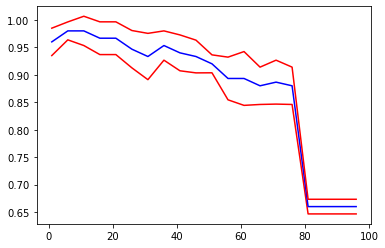

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'], color = 'r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'], color = 'b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'], color = 'r');

In [24]:
# Utilizar sklearn para padronizar a matriz de Features
from sklearn import preprocessing
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = preprocessing.scale(X, axis = 0)
#print(X)

In [25]:
# Verificar se as colunas têm média 0 e desvio 1.
print('media:',np.mean(X[:,1]))
print('desvio:',np.std(X[:,1]))

media: -7.815970093361102e-16
desvio: 0.9999999999999999


In [26]:
# Calcular os scores de validação cruzada novamente, mas desta vez sobre os recursos padronizados
from sklearn.model_selection import cross_val_score

scores_para_df_standar = []

error_rates = {}

for i in range(1, 100, 5):
    
    model = KNeighborsClassifier(n_neighbors = i)
    
    cv_scores = cross_val_score(model, 
                                X, 
                                y, 
                                cv = 5
                               )
    
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores),
                      'n_neighbours':i
                     }
    scores_para_df_standar.append(dict_row_score)
    
    error = 1 - np.mean(cross_val_score(model, X, y, cv = 5))
    error_rates.update({i:error})

In [27]:
error_rates

{1: 0.053333333333333455,
 6: 0.033333333333333215,
 11: 0.053333333333333455,
 16: 0.06666666666666665,
 21: 0.053333333333333344,
 26: 0.06666666666666676,
 31: 0.07333333333333347,
 36: 0.09333333333333338,
 41: 0.11999999999999988,
 46: 0.1266666666666667,
 51: 0.14,
 56: 0.1333333333333332,
 61: 0.15333333333333332,
 66: 0.14666666666666672,
 71: 0.14666666666666672,
 76: 0.17333333333333323,
 81: 0.29333333333333333,
 86: 0.32000000000000006,
 91: 0.33333333333333337,
 96: 0.3466666666666668}

In [28]:
min(error_rates, key = error_rates.get)

6

In [29]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar

,score_medio,score_std,n_neighbours
0,0.946667,0.033993,1
1,0.966667,0.036515,6
2,0.946667,0.033993,11
3,0.933333,0.047140,16
4,0.946667,0.040000,21
5,0.933333,0.042164,26
6,0.926667,0.048990,31
7,0.906667,0.038873,36
8,0.880000,0.033993,41
9,0.873333,0.048990,46


In [30]:
# Criar os limites para representação gráfica novamente
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

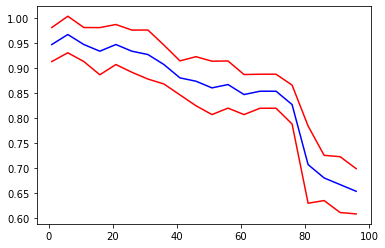

In [31]:
# Buscar graficamente o valor ideal para n_neighbors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color = 'r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color = 'b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color = 'r');

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
# Escolher o modelo ideal que foi indicado pela validação cruzada
model = KNeighborsClassifier(n_neighbors = 6)

# Ajustá-lo sobre os dados de treinamento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [34]:
# Ele é utilizado para prever em teste
y_pred = model.predict(X_test)

In [35]:
# Elaborar a matriz de confusão:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 13]], dtype=int64)

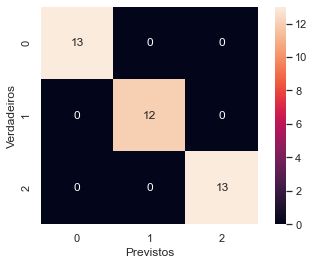

In [36]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.ylabel('Verdadeiros')
plt.xlabel('Previstos');

In [37]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

#### Exercício 3: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `Logistic regression` e carregue o arquivo `cancer-prostate.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.


#### Realize separação entre atributos descritivos e targets e faça a padronização dos dados, codificando os diagnósticos. Calcule uma matriz de correlação entre os atributos descritivos e a imprima em um mapa de calor. 

#### Estabeleça uma estratégia para a validação cruzada e estude os dados de modelo, coeficientes e scores para diferentes quantidades de dobras.

#### Por fim, separe seu dataset em subconjuntos de treino e teste e submeta-o a um modelo de regressão logística, ajustando os dados de treino. Calcule os coeficientes de intercepção e de inclinação dos diversos coeficientes angulares. calcule a matriz de confusão dos dados e a acurácia do modelo. Calcule também a curva ROC e a área sob a curva AUC para seu modelo.

In [39]:
### Importar os pacotes a serem usados
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [40]:
### Importamos os dados

df = pd.read_csv('cancer-prostate.csv')
#df.sample(10)

df = df[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension', 'diagnosis_result']]
df.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,23,12,151,954,0.143,0.278,0.242,0.079,M
1,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,14,16,78,386,0.070,0.284,0.260,0.097,M
4,9,19,135,1297,0.141,0.133,0.181,0.059,M


In [41]:
df['diagnosis_result'][df['diagnosis_result'] == 'M'] = 1
df['diagnosis_result'][df['diagnosis_result'] == 'B'] = 0
df['diagnosis_result'] = df['diagnosis_result'].astype(int)
#df['diagnosis_result'] = pd.to_numeric(df['diagnosis_result'], errors = 'coerce')

<ipython-input-41-76ec086ed326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis_result'][df['diagnosis_result'] == 'B'] = 0


In [42]:
#df.columns
#df.shape
df.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,23,12,151,954,0.143,0.278,0.242,0.079,1
1,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,14,16,78,386,0.070,0.284,0.260,0.097,1
4,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             100 non-null    int64  
 1   texture            100 non-null    int64  
 2   perimeter          100 non-null    int64  
 3   area               100 non-null    int64  
 4   smoothness         100 non-null    float64
 5   compactness        100 non-null    float64
 6   symmetry           100 non-null    float64
 7   fractal_dimension  100 non-null    float64
 8   diagnosis_result   100 non-null    int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 6.8 KB


In [44]:
df.iloc[:,0:len(df)].describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690,0.620000
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151,0.487832
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000,0.000000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000,0.000000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000,1.000000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000,1.000000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000,1.000000


In [45]:
# Matriz de atributos descritivos
X = df[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]
X = preprocessing.scale(X, axis = 0)

# Vetor de targets
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['diagnosis_result'])
print(y)

[1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1]


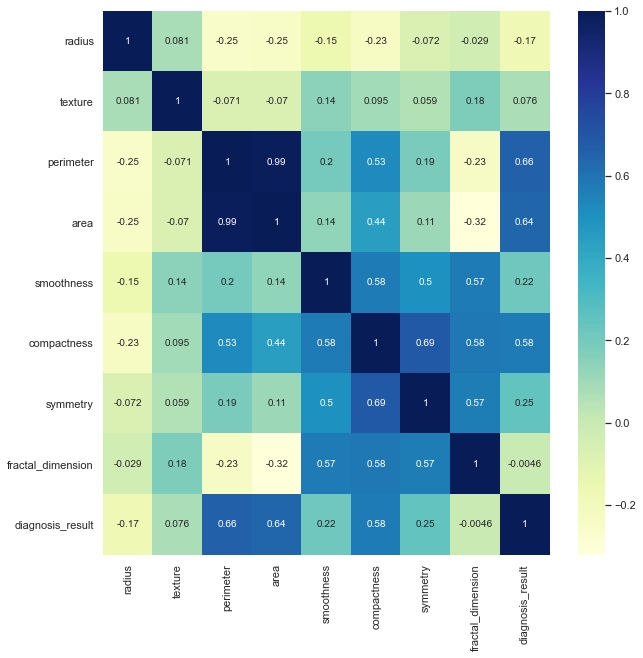

In [46]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(df.corr(method = 'spearman').iloc[0:len(df), 
                                                       0:len(df) ], 
            annot = True,
            cmap = "YlGnBu"
                    )

In [47]:
X = df.iloc[:, 0 : 8]
y = df['diagnosis_result']
print(X)
#print(y)

    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension  
0               0.079  
1               0.057  
2               0.060  
3  

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 

kf = KFold(n_splits = 10,
           shuffle = True,
           random_state = None
          )

logit = LogisticRegression(max_iter = 250)

kf_y_preds = []
kf_model = []
kf_coefs = []
kf_scores = []
kf_matrix = []

for k, (train_index, test_index) in enumerate(kf.split(X)):
    
    model = logit.fit(X.iloc[train_index], 
                      y[train_index]
                     )
    kf_model.append(model)
    
    coefs = model.coef_
    
    y_preds = model.predict(X.iloc[test_index])
    
    kf_y_preds.append(y_preds)
    
    kf_coefs.append(coefs)
    
    scores = accuracy_score(y[test_index],
                            y_preds
                           )
    
    kf_scores.append(scores)
    
    matrix = confusion_matrix(y[test_index], 
                              y_preds
                             )
    
    kf_matrix.append(matrix)
    
    print("K", k, " = ", scores, sep = "")   

K0 = 0.8
K1 = 0.9
K2 = 0.9
K3 = 0.7
K4 = 0.8
K5 = 0.9
K6 = 0.9
K7 = 0.7
K8 = 0.8
K9 = 1.0


In [49]:
np.mean(kf_scores)

0.8400000000000001

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
reglogsklearn = LogisticRegression(fit_intercept = True, 
                                   penalty = 'l2', 
                                   C = 1e10)

reglogsklearn.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

In [52]:
reglogsklearn.intercept_, reglogsklearn.coef_

(array([2.89647648]),
 array([[-1.91029935e-02, -5.13714287e-02, -4.53462825e-01,
          5.65803337e-02, -8.64541765e-01,  4.78588682e+01,
          5.67267537e+00,  5.58956651e+00]]))

In [53]:
y_pred2 = reglogsklearn.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8

In [54]:
confusion_matrix(y_test, y_pred2)

array([[ 6,  3],
       [ 2, 14]], dtype=int64)

In [55]:
np.sum(y_test == y_pred2)/len(y_test)

0.8

In [56]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, accuracy_score
fpr_log, tpr_log, thr_log = roc_curve(y_test, 
                                    y_pred2
                                   )

In [57]:
df_roc = pd.DataFrame(dict(fpr = fpr_log, 
                       tpr = tpr_log, 
                       thr = thr_log
                      )
                 )

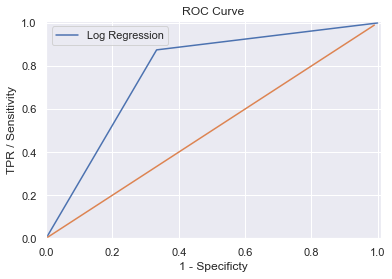

In [58]:
plt.axis([0, 1.01, 0, 1.01])

plt.xlabel('1 - Specificty')

plt.ylabel('TPR / Sensitivity')

plt.title('ROC Curve')

plt.plot(df_roc['fpr'],
         df_roc['tpr']
        )

plt.plot(np.arange(0,1, 
                   step = 0.01
                  ), 
         np.arange(0,1, 
                   step = 0.01
                  )
        )

plt.legend(['Log Regression'])

plt.show()

In [59]:
print('AUC=', auc(fpr_log, 
                  tpr_log
                 )
     )

AUC= 0.7708333333333335


#### Exercício 4: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `GaussianNB` e carregue o arquivo `diabetes.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.

#### Separe o dataframe criado entre atributos descritivos e tagets e então separe-os em conjuntos de treino e teste. Submeta os dados de treino a um modelo Naive Bayes e ajuste os dados de treino. 

#### Realize as previsões e calcule a acurácia do modelo. Calcule também a matriz de confusão e a imprima em conjunto com um mapa de calor para inspeção visual. Calcule também a curva ROC e a área sob a curva AUC para seu modelo.

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('diabetes.csv')
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [63]:
df.shape

(995, 3)

In [64]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [66]:
model = GaussianNB()

In [67]:
model.fit(X_train, y_train)

GaussianNB()

In [68]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtyp

In [69]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9331103678929766

In [70]:
# Elaborar a matriz de confusão:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[130,  10],
       [ 10, 149]], dtype=int64)

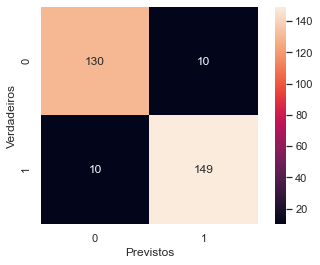

In [71]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.ylabel('Verdadeiros')
plt.xlabel('Previstos');

In [72]:
fpr_nb, tpr_nb, thr_nb = roc_curve(y_test, 
                                 y_pred
                                )

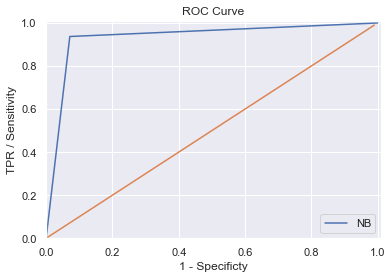

In [73]:
plt.axis([0, 1.01, 0, 1.01])

plt.xlabel('1 - Specificty')

plt.ylabel('TPR / Sensitivity')

plt.title('ROC Curve')

plt.plot(fpr_nb, tpr_nb)

plt.plot(np.arange(0,1, step =0.01), 
         np.arange(0,1, step =0.01)
        )

plt.legend(['NB'])

plt.show() 

In [74]:
print('AUC=', auc(fpr_nb, 
                  tpr_nb
                 )
     )

AUC= 0.9328391734052112


#### Exercício 5: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `SVM` e carregue o arquivo `winequality-red.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.

#### Realize os procedimentos de separação dos dados entre atributos descritivos e targets; Faça a separação destes entre subconjuntos de treino e teste e encontre a melhor função de Kernel para obter a maior acurácia possível para a previsão do nível de qualidade dos vinhos do dataset.

In [75]:
# Importamos as bibliotecas a serem usadas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [76]:
### Importamos os dados

df = pd.read_csv('winequality-red.csv')

df.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
371,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
636,9.6,0.88,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7


In [77]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [79]:
df.shape

(1599, 12)

In [80]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [81]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [82]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'
       ]
      ]

In [83]:
y = df['quality']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 53
                                                   )

In [85]:
from sklearn.model_selection import cross_val_score

svc_C = [0.1, 0.2, 0.3, 0.4, 0.5]

error_rates = {}

for c in svc_C:
        model_svc = SVC(kernel = 'linear', 
                        class_weight = 'balanced', 
                        C = c
                       )
        print (np.mean(cross_val_score(model_svc, 
                                       X_train, 
                                       y_train, 
                                       cv = 5
                                      )
                      ),
               ' C:', c
              )
        
        error = 1 - np.mean(cross_val_score(model_svc, 
                                            X_train, 
                                            y_train, 
                                            cv = 5
                                           )
                           )
        error_rates.update({(c): error})

0.31855299860529984  C: 0.1
0.3427405857740585  C: 0.2
0.3444211994421199  C: 0.3
0.3410774058577406  C: 0.4
0.3519246861924686  C: 0.5


In [86]:
print(error_rates)
min(error_rates, key = error_rates.get)

{0.1: 0.6814470013947002, 0.2: 0.6572594142259415, 0.3: 0.6555788005578801, 0.4: 0.6589225941422594, 0.5: 0.6480753138075315}


0.5

In [87]:
optimalC = min(error_rates, key = error_rates.get)

In [88]:
best_model = SVC(C = optimalC, 
                 kernel = 'linear'
                )

In [89]:
best_model.fit(X_train, 
               y_train
              )

SVC(C=0.5, kernel='linear')

In [90]:
y_pred = best_model.predict(X_test)

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, 
                            y_pred,
                            zero_division = 0
                           )
     )

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.69      0.79      0.74       173
           6       0.51      0.70      0.59       147
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.20      0.25      0.22       400
weighted avg       0.49      0.60      0.53       400



In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, 
                       y_pred
                      )
     )

[[  0   0   3   1   0   0]
 [  0   0  11   5   0   0]
 [  0   0 136  37   0   0]
 [  0   0  44 103   0   0]
 [  0   0   3  52   0   0]
 [  0   0   0   5   0   0]]


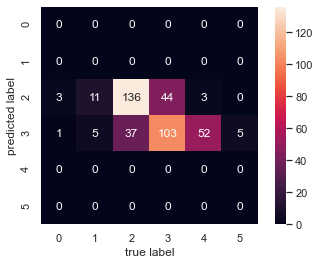

In [93]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, 
                       y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.xlabel('true label')
plt.ylabel('predicted label');

In [94]:
accuracy_score(y_test, 
               y_pred
              )

0.5975